In [60]:
# primeiro importa o csv
import pandas as pd
import matplotlib.pyplot as plt

uri = 'https://raw.githubusercontent.com/Cogitus/Est-dios-Mapinguari/master/tabelas/Tabela%2BReferencia%2BAuditoria%2Bde%2BObras%2BP%C3%BAblicas%2B-%2BAN%C3%81LISE%2BAVAN%C3%87ADA%2B-%2B03%2BEMPRESAS%20-%20Custo%20UnitxQuant%20(Input).csv'

In [61]:
#importando para um objeto Pandas

dados = pd.read_csv(uri)
dados.head()

,ITEM,REFORMA DA PRAÇA MUNICIPAL SÃO JOÃO BATISTA,UND.,QUANT.,PRECO_UNIT_0,PRECO_UNIT_1,PRECO_UNIT_2,PRECO_UNIT_3
0,NaN,1 DEMOLIÇÕES,NaN,NaN,NaN,NaN,NaN,NaN
1,1.1,Demolição de revestimentos de pedras naturais,m²,15.0,18.90,18.70,18.25,18.35
2,1.2,Demolição de revestimentos de pedras naturais,m²,16.0,18.80,18.65,18.20,18.30
3,1.3,Demolição de revestimentos de pedras naturais,m²,17.0,18.70,18.60,18.15,18.25
4,1.4,Demolição de revestimentos de pedras naturais,m²,18.0,18.60,18.55,18.10,18.20


In [62]:
# elimina os NaN

dados = dados.dropna()


In [63]:
# a quinta coluna é o preço contido no edital
# aqui chamamos de PRECO_UNIT

# PRECO_UNIT_0 se refere à referência
# dos preços contidos no edital

qntEmp = dados.shape[1] - 4
qntItems = dados.shape[0]

print(f'{qntEmp} , {qntItems}')

4 , 220


In [64]:
# convertemos pra float, pois essa coluna não estava sendo identificada (type = object)
dados["PRECO_UNIT_0"] = dados.PRECO_UNIT_0.astype(float)
dados["PRECO_UNIT_1"] = dados.PRECO_UNIT_1.astype(float)
dados["PRECO_UNIT_2"] = dados.PRECO_UNIT_2.astype(float)
dados["PRECO_UNIT_3"] = dados.PRECO_UNIT_3.astype(float)


In [65]:
# A coluna com os preços do edital se chama PRECO_UNIT_0
# As colunas com os preços das empresas se chamam PRECO_UNIT_#, com # o numero da empresa
# começando com 1.

# aqui geramos uma lista vazia que conterá 
# os nomes das Pandas.Series para as empresas 
# que estão se aplicando no Edital
lista_de_series_empresas = ['']*qntEmp

# aqui inserimos os nomes das series pandas
for i in range(0,qntEmp):
    print(i)
    serie_title = f'PRECO_UNIT_{i}'
    lista_de_series_empresas[i] = serie_title
    print(lista_de_series_empresas[i])

0
PRECO_UNIT_0
1
PRECO_UNIT_1
2
PRECO_UNIT_2
3
PRECO_UNIT_3


In [66]:
#iremos copiar a lista de nomes
# pra poder usar o metodo list.remove(_)
# sem alterar a lista original
copia_da_lista_empresas = lista_de_series_empresas.copy()
print(copia_da_lista_empresas)

['PRECO_UNIT_0', 'PRECO_UNIT_1', 'PRECO_UNIT_2', 'PRECO_UNIT_3']


In [67]:
tabela_diff_abs_empresas = pd.DataFrame()
tabela_diff_perc_empresas = pd.DataFrame()

for s_t in lista_de_series_empresas: # s_t stands for series_title    
    # remove o primeiro elemento da lista
    copia_da_lista_empresas.remove(s_t)
    for s_t2 in copia_da_lista_empresas:
        #gerando as colunas de diferenças absolutas
        coluna1 = (dados[s_t] - dados[s_t2])
        titulo_da_coluna1 = f'{s_t}_{s_t2}'
        
        #gerando as colunas de diferenças relativas
        coluna2 = 100*((dados[s_t] - dados[s_t2])/dados[s_t])
        titulo_da_coluna2 = f'{s_t}_{s_t2}'
        
        tabela_diff_abs_empresas[titulo_da_coluna1] = coluna1 
        tabela_diff_perc_empresas[titulo_da_coluna2] = coluna2

    
tabela_diff_perc_empresas

,PRECO_UNIT_0_PRECO_UNIT_1,PRECO_UNIT_0_PRECO_UNIT_2,PRECO_UNIT_0_PRECO_UNIT_3,PRECO_UNIT_1_PRECO_UNIT_2,PRECO_UNIT_1_PRECO_UNIT_3,PRECO_UNIT_2_PRECO_UNIT_3
1,1.058201,3.439153,2.910053,2.406417,1.871658,-0.547945
2,0.797872,3.191489,2.659574,2.412869,1.876676,-0.549451
3,0.534759,2.941176,2.406417,2.419355,1.881720,-0.550964
4,0.268817,2.688172,2.150538,2.425876,1.886792,-0.552486
5,0.000000,2.432432,1.891892,2.432432,1.891892,-0.554017
6,-0.271739,2.173913,1.630435,2.439024,1.897019,-0.555556
7,-0.546448,1.912568,1.366120,2.445652,1.902174,-0.557103
8,1.871658,4.278075,3.743316,2.452316,1.907357,-0.558659
9,1.612903,4.032258,3.494624,2.459016,1.912568,-0.560224
10,1.351351,3.783784,3.243243,2.465753,1.917808,-0.561798


In [68]:
# exemplo. Apagar depois
contagem_diff_abs = tabela_diff_abs_empresas.groupby(tabela_diff_abs_empresas['PRECO_UNIT_1_PRECO_UNIT_2'].map(lambda x: "%.2f" % x)).size()

In [69]:
# vamos gerar duas listas que recebem 
# as séries oriundas da contagem de repetições
lista_repeticoes_abs = list()
lista_repeticoes_perc = list()

In [70]:
# precisamos dos nomes das colunas do dataframe
# pra poder iterar sobre os dataframes tabela_diff_abs_empresas
# e tabela_diff_perc_empresas

colunas_dataframe_abs = list(tabela_diff_abs_empresas.columns.values) # lista de nomes de colunas em tabela_diff_abs_empresas
colunas_dataframe_perc = list(tabela_diff_perc_empresas.columns.values) # lista de nomes de colunas em tabela_diff_perc_empresas

In [71]:
# agora iremos construir as listas de contagens de repetições

for titulo in colunas_dataframe_abs: # ambos os dataframes possuem o mesmo nome pras colunas
                                    # assim, vamos escolher qualquer um dos dataframes pra 
                                    # ser iterado.
            
    # aqui geraremos as contagens das repetições que existem na coluna nomeada com 'titulo'
    # pro dataframe tabela_diff_perc_empresas e tabela_diff_abs_empresas.
    contagem_abs = tabela_diff_abs_empresas.groupby(tabela_diff_abs_empresas[titulo].map(lambda x: "%.2f" % x)).size()
    contagem_perc = tabela_diff_perc_empresas.groupby(tabela_diff_perc_empresas[titulo].map(lambda x: "%.1f" % x)).size()
        
    # após gerar as contagens precisamos colocá-las nas listas de contagens
      
    lista_repeticoes_abs.append(contagem_abs)
    lista_repeticoes_perc.append(contagem_perc)
        
# printando, apagar depois

In [72]:
# aqui organizam-se as séries contidas nas listas em ordem decrescente (maiores repitições aparecem no topo). 
for i in range(0,len(lista_repeticoes_abs)): #como ambas listas possuem o mesmo tamanho, tanto faz qual usar pra ter o tamanho
    lista_repeticoes_abs[i]=lista_repeticoes_abs[i].sort_values(ascending=False)   # organizando
    lista_repeticoes_perc[i]=lista_repeticoes_perc[i].sort_values(ascending=False) # organizando
    
    lista_repeticoes_abs[i]=lista_repeticoes_abs[i][lista_repeticoes_abs[i]>1]
    lista_repeticoes_perc[i]=lista_repeticoes_perc[i][lista_repeticoes_perc[i]>1]
    
    
lista_repeticoes_abs


[PRECO_UNIT_0_PRECO_UNIT_1
 0.45     21
 0.55     11
 0.25     11
 0.30     11
 1.15     11
 0.60     11
 0.65     11
 0.70     11
 0.20     11
 0.35     11
 1.00     11
 0.40     11
 0.15     10
 0.10     10
 0.05     10
 0.00     10
 -0.10    10
 1.30     10
 -0.05    10
 dtype: int64, PRECO_UNIT_0_PRECO_UNIT_2
 0.45     21
 0.60     21
 0.75     21
 -0.10    20
 0.70     11
 0.35     11
 0.40     11
 0.50     11
 0.65     11
 1.15     11
 0.80     11
 0.55     11
 0.10     10
 0.05     10
 0.00     10
 -0.15    10
 dtype: int64, PRECO_UNIT_0_PRECO_UNIT_3
 0.35     21
 0.50     21
 0.65     21
 -0.20    20
 1.05     11
 0.55     11
 0.25     11
 0.30     11
 0.40     11
 0.45     11
 0.60     11
 0.70     11
 0.00     10
 -0.25    10
 -0.10    10
 -0.05    10
 dtype: int64, PRECO_UNIT_1_PRECO_UNIT_2
 0.45     121
 -0.55     99
 dtype: int64, PRECO_UNIT_1_PRECO_UNIT_3
 0.35     121
 -0.65     99
 dtype: int64, PRECO_UNIT_2_PRECO_UNIT_3
 -0.10    220
 dtype: int64]

In [54]:

# script que gera os gráficos
"""
def gerar_graficos(lista_repeticoes_abs, lista_repeticoes_perc): 
    
    input: listas de contagem de repeticões, absolutas e percentuais
    output: fotos, em .png, dos gráficos de contagem absoluta e percentual (TO_DO)  
    
    
    # As fotos não são retornadas, apenas salvas na pasta atual.
    
    # aqui organizam-se as séries contidas nas listas em ordem decrescente (maiores repitições aparecem no topo). 
    for i in range(0,len(lista_repeticoes_abs)): #como ambas listas possuem o mesmo tamanho, tanto faz qual usar pra ter o tamanho
        lista_repeticoes_abs[i]=lista_repeticoes_abs[i].sort_values(ascending=False)   # organizando
        lista_repeticoes_perc[i]=lista_repeticoes_perc[i].sort_values(ascending=False) # organizando
        
    # fazer uma copia das listas das series pra podermos gerar os graficos
    copia_lista_rep_abs = lista_repeticoes_abs.copy()
    copia_lista_rep_perc = lista_repeticoes_perc.copy()       
    
    # aqui iremos normalizar os dados 
    for i in range (0,len(lista_repeticoes_abs)):
        soma = copia_lista_rep_abs[i].astype(float).values.sum() # para cada série precisamos da soma total
        for j in range(0,len(lista_repeticoes_abs[i])):
            copia_lista_rep_abs[i][j]=100*(copia_lista_rep_abs[i][j]/soma) # cada valor da série é dividido pelo valor total
            copia_lista_rep_perc[i][j]=100*(copia_lista_rep_perc[i][j]/soma) # cada valor da série é dividido pelo valor total
    # aqui iremos plotar os gráficos
    import matplotlib.pyplot as plt

    #plotagem do gráfico de diferenças absolutas
    for i in range (0,len(lista_repeticoes_abs)):
        plt.figure(i)

        plt.xticks(rotation = 90) # fazer os elementos do eixo das abcissas rotacionarem 90º, evitando poluição visual.
        plt.ylim([0,100])

        plt.title('grafico de risco')
        plt.ylabel('%')
        plt.xlabel('elemento repetido')
        plt.bar(copia_lista_rep_abs[i].index,lista_repeticoes_abs[i].values)#plotagem do gráfico de diferenças percentuais
        plt.savefig(str(i)+'abs.png')    
"""

"\ndef gerar_graficos(lista_repeticoes_abs, lista_repeticoes_perc): \n    \n    input: listas de contagem de repeticões, absolutas e percentuais\n    output: fotos, em .png, dos gráficos de contagem absoluta e percentual (TO_DO)  \n    \n    \n    # As fotos não são retornadas, apenas salvas na pasta atual.\n    \n    # aqui organizam-se as séries contidas nas listas em ordem decrescente (maiores repitições aparecem no topo). \n    for i in range(0,len(lista_repeticoes_abs)): #como ambas listas possuem o mesmo tamanho, tanto faz qual usar pra ter o tamanho\n        lista_repeticoes_abs[i]=lista_repeticoes_abs[i].sort_values(ascending=False)   # organizando\n        lista_repeticoes_perc[i]=lista_repeticoes_perc[i].sort_values(ascending=False) # organizando\n        \n    # fazer uma copia das listas das series pra podermos gerar os graficos\n    copia_lista_rep_abs = lista_repeticoes_abs.copy()\n    copia_lista_rep_perc = lista_repeticoes_perc.copy()       \n    \n    # aqui iremos nor

In [55]:
# fazer uma copia das listas das series pra podermos gerar os graficos
copia_lista_rep_abs = lista_repeticoes_abs.copy()
copia_lista_rep_perc = lista_repeticoes_perc.copy()

In [56]:
# aqui iremos normalizar os dados 

for i in range (0,len(lista_repeticoes_abs)):

    soma = copia_lista_rep_abs[i].astype(float).values.sum() # para cada série precisamos da soma total
    
    for j in range(0,len(lista_repeticoes_abs[i])):
        
        copia_lista_rep_abs[i][j]=100*(copia_lista_rep_abs[i][j]/soma) # cada valor da série é dividido pelo valor total
        copia_lista_rep_perc[i][j]=100*(copia_lista_rep_perc[i][j]/soma) # cada valor da série é dividido pelo valor total
        
    


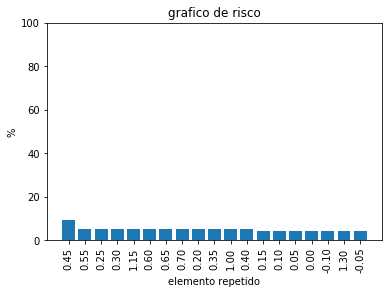

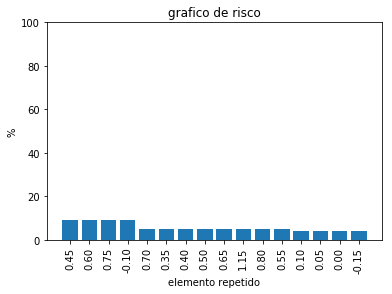

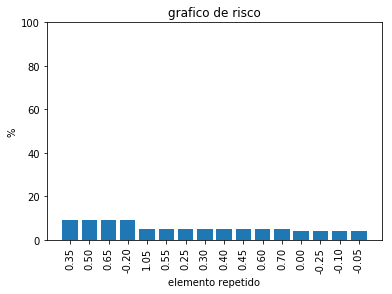

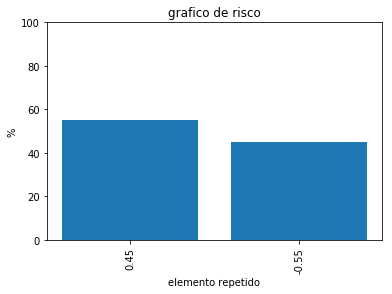

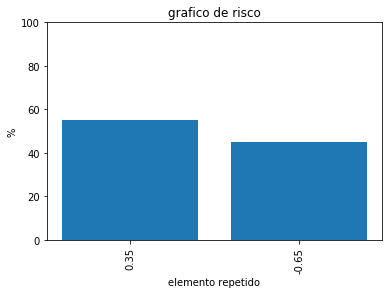

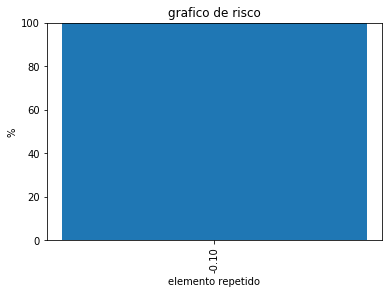

In [57]:
# aqui iremos plotar os gráficos
import matplotlib.pyplot as plt

#plotagem do gráfico de diferenças absolutas
for i in range (0,len(lista_repeticoes_abs)):
    plt.figure(i)
    
    plt.xticks(rotation = 90) # fazer os elementos do eixo das abcissas rotacionarem 90º, evitando poluição visual.
    plt.ylim([0,100])
    
    plt.title('grafico de risco')
    plt.ylabel('%')
    plt.xlabel('elemento repetido')
    plt.bar(copia_lista_rep_abs[i].index,lista_repeticoes_abs[i].values)#plotagem do gráfico de diferenças percentuais
    plt.savefig(str(i)+'abs.png')

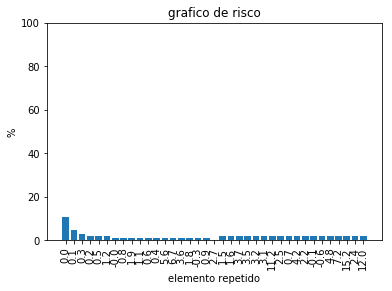

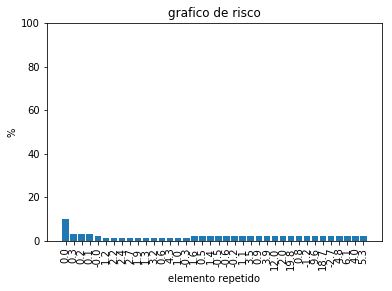

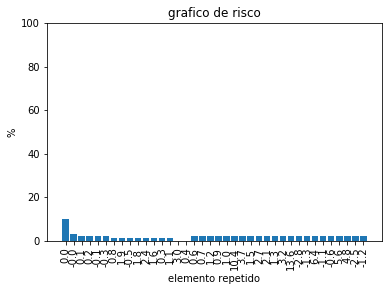

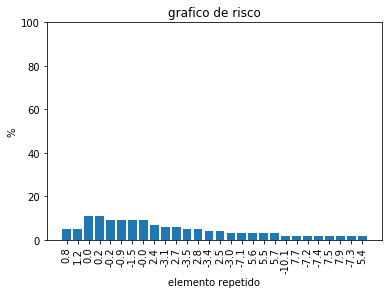

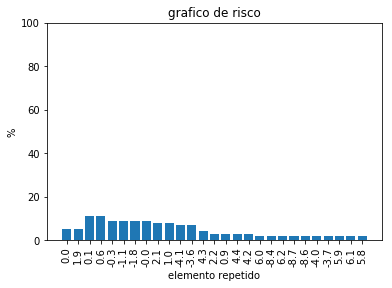

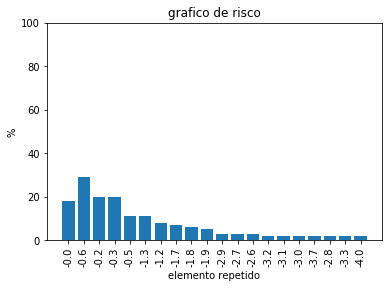

In [58]:
#plotagem do gráfico de diferenças percentuais
for i in range (0,len(lista_repeticoes_abs)):
    plt.figure(i+6)
    
    plt.xticks(rotation = 90) # fazer os elementos do eixo das abcissas rotacionarem 90º, evitando poluição visual.
    plt.ylim([0,100])
    
    plt.title('grafico de risco')
    plt.ylabel('%')
    plt.xlabel('elemento repetido')
    plt.bar(copia_lista_rep_perc[i].index,copia_lista_rep_perc[i].values)    
    plt.savefig(str(i)+'perc.png')

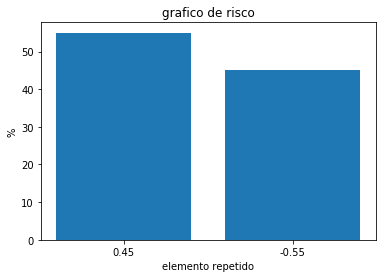

In [38]:
import matplotlib.pyplot as plt

plt.title('grafico de risco')
plt.ylabel('%')
plt.xlabel('elemento repetido')
plt.bar(lista_repeticoes_abs[3].index,lista_repeticoes_abs[3].values)
plt.show()

In [28]:
fullDataFrame = pd.concat([ lista_repeticoes_abs[0],lista_repeticoes_abs[1],lista_repeticoes_abs[2],lista_repeticoes_abs[3],lista_repeticoes_abs[4],lista_repeticoes_abs[5]], keys={ 'Ed x E1' : lista_repeticoes_abs[0], 'Ed x E2' : lista_repeticoes_abs[1], 'Ed x E3' : lista_repeticoes_abs[2], 'E1 x E2' : lista_repeticoes_abs[3], 'E1 x E3' : lista_repeticoes_abs[4], 'E2 x E3' : lista_repeticoes_abs[5] })
fullDataFrame.to_csv('arquivo_final.csv',sep=',')

C:\Users\lu_fe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [29]:
data_lista_abs = pd.DataFrame(lista_repeticoes_abs)

In [30]:
lista_repeticoes_abs[0]

PRECO_UNIT_0_PRECO_UNIT_1
0.45     9
0.55     5
0.25     5
0.30     5
1.15     5
0.60     5
0.65     5
0.70     5
0.20     5
0.35     5
1.00     5
0.40     5
0.15     4
0.10     4
0.05     4
0.00     4
-0.10    4
1.30     4
-0.05    4
1.05     0
0.50     0
0.75     0
0.80     0
0.85     0
0.90     0
0.95     0
1.10     0
dtype: int64